### 1. 공장에서 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

데이터 : 시제품 샘플 농도) 52, 50, 62, 75, 26, 45, 62, 35, 57, 14

#### (1) 연구가설, 귀무가설을 작성하시오.

※ 중심극한의 정리를 적용하기에 표본의 크기가 작으므로(n<30) 비모수 분석의 부호검정을 실시한다.

귀무가설(H0) : 시제품의 농도는 60이다.

대립가설(H1) : 시제품의 농도는 60이 아니다.

#### (2) 유효한 샘플의 수를 계산하시오.

유효한 샘플의 수는 최소 표본크기를 계산하여 설정할 수 있다. 

최소 표본크기의 계산은 허용오차식을 바탕으로 한다. 

허용할 수 있는 오차한계와 신뢰수준이 주어졌을 때, 샘플로부터 추정한 표준편차를 사용해 표본의 크기를 구할 수 있다. 

오차한계를 5, 신뢰수준을 0.05로 설정한 뒤 샘플의 표준편차를 구한다.

#### 참고 : 허용오차식: 추정의 정확도를 나타내는 지표
어떤 모집단의 특성(예: 평균, 비율 등)을 표본으로부터 추정할 때,

추정치가 실제 모집단의 값과 얼마나 차이가 날 수 있는지를 나타내는 식

-> 추정의 정확도를 수치적으로 표현하는 것

#### ○허용오차식의 구성 요소

ㆍ오차 한계 (margin of error): '추정치'와 '실제 모집단 값' 사이의 최대 차이

ㆍ신뢰 수준 (confidence level): 추정치가 실제 모집단 값을 포함할 확률 (일반적으로 95% or 99% 사용)

ㆍ표준 오차 (standard error): 표본 통계량의 표준 편차로, 표본 통계량의 변동성

ㆍz 값 또는 t 값: 표준 정규 분포 또는 t 분포에서 신뢰 수준에 해당하는 값입니다.

○모집단의 표준 편차를 알고 있을 때 : 허용오차 = z 값 * (표준 오차) 

○모집단의 표준 편차를 모르고 표본 표준 편차를 사용할 때 : 허용오차 = t 값 * (표준 오차)

#### ○허용오차식의 의미와 활용

ⓐ추정의 정확도: 허용오차가 작을수록 추정치가 실제 모집단 값에 가까울 가능성이 높아진다.

ⓑ표본크기: 표본크기가 커질수록 표준오차가 작아져 허용오차도 줄어들고, 추정의 정확도가 높아진다.

ⓒ신뢰수준: 신뢰수준이 높아질수록 허용오차가 커집니다.(더 높은 확률로 모집단 값을 포함하도록 하려면 허용오차를 넓혀야 합니다.)

※ 허용오차식의 활용 : 여론 조사, 품질 관리, 의학 연구

In [17]:
import numpy as np
import pandas as pd
#표준편차 구하기
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]
moe=5 #오차한계(margin of error)
a=0.05 # 신뢰수준
std = np.std(x) #표준편차
print(std) # 17.434448657758008 

17.434448657758008


▣ 허용오차 공식

n = (Zα/2 * σ / E)²

n: 필요한 최소 표본 크기

Zα/2: 신뢰 수준에 따른 표준 정규 분포의 값 (예: 95% 신뢰 수준일 때, Zα/2 = 1.96)

σ: 모집단의 표준 편차

E: 허용 오차

In [16]:
# (2) 최소 표본 크기 계산하기

# 허용오차식에 오차한계 5. 신뢰수준 0.05, 샘플의 표준편차 대입
sample_n = (stats.t.ppf(q=0.05, df=9) * std/5)**2
sample_n
# 40.85590828532381 
# 유효한 샘플의 수는 40개 이상이다.

# 코드해석
# stats.t.ppf(q=0.05, df=9): t 분포의 백분위수를 구하는 함수
# PPF(Percent Point Function) : 주어진 확률에 해당하는 값을 찾는 함수()
# q=0.05 : 유의 수준이 0.05이므로, 양측 검정에서 각 꼬리에 2.5%의 확률이 오도록 하는 t 값을 구한다.
# df=9 : 샘플 개수가 10개이므로 자유도는 10-1 = 9. 자유도가 9인 t 분포에서 위의 조건을 만족하는 t 값을 구한다.
# std/5: 표준편차를 오차 한계 5로 나눈 값입니다.

40.85590828532381

#### (3)검정통계량을 구하고 연구가설 채택여부를 작성하시오

In [4]:
# 표본의 크기가 작으므로 'Wilcoxon의 부호검정'을 선택한다.
# (비교대상들 사이의 차이를 '부호'와 '크기'에 대한 정보로 바꾸어 이를 토대로 분포를 비교하는 방식)

from scipy import stats
stats.wilcoxon(pd.Series(x)-60)

# WilcoxonResult(statistic=9.5, pvalue=0.064453125)

# 검정 결과 p-value = 0.064453125 > 0.05 이므로 (귀무가설 채택)
# 즉, 시제품의 농도는 60이라고 판단할 수 있다.

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

### 2. 코로나 시계열 데이터로 다음을 수행하시오.

데이터를 읽어온 뒤 ACF 함수의 입력형식에 맞추기 위해 날짜 변수를 제외한 데이터를 covid1에 저장한다.


In [8]:
import pandas as pd
covid = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%BD%94%EB%A1%9C%EB%82%9819.csv')
# print(covid.head())  #지역별 코로나 확진자 수 시계열 데이터
print(covid.info()) # 관측치수 785개
covid1 = covid[covid.columns.difference(['날짜'])]
display(covid1.head()) #날짜 컬럼 제외한 df생성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      785 non-null    object
 1   종로구     785 non-null    int64 
 2   중구      785 non-null    int64 
 3   용산구     785 non-null    int64 
 4   성동구     785 non-null    int64 
 5   광진구     785 non-null    int64 
 6   동대문구    785 non-null    int64 
 7   중랑구     785 non-null    int64 
 8   성북구     785 non-null    int64 
 9   강북구     785 non-null    int64 
 10  도봉구     785 non-null    int64 
 11  노원구     785 non-null    int64 
 12  은평구     785 non-null    int64 
 13  서대문구    785 non-null    int64 
 14  마포구     785 non-null    int64 
 15  양천구     785 non-null    int64 
 16  강서구     785 non-null    int64 
 17  구로구     785 non-null    int64 
 18  금천구     785 non-null    int64 
 19  영등포구    785 non-null    int64 
 20  동작구     785 non-null    int64 
 21  관악구     785 non-null    int64 
 22  서초구     785 non-null    in

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,136200,121926,75118,148359,132305,96008,109973,63687,135361,82254,...,81018,116862,176765,115771,110293,55376,119150,37261,33753,103288
1,132333,118842,72934,143573,127626,93474,106162,61840,130878,79677,...,79030,113609,172292,111900,106171,53872,115116,36216,32835,100255
2,128813,115846,70754,139633,124805,91030,103573,59946,127299,77878,...,76802,110583,167386,109290,104109,52391,112560,35276,31878,97419
3,126296,113549,70003,137908,123374,89876,102610,59393,125120,76542,...,76108,109500,165373,107582,102916,51652,110620,34879,31577,96359
4,123992,110649,68329,134285,120413,87770,99938,57925,121314,75119,...,74178,106437,161650,104991,100349,50720,108254,34061,30903,93690


#### (1)ACF를 사용해서 distance를 계산하시오

In [10]:
# statsmodels 라이브러리의 acf 함수를 사용하여 실제 계산 수행
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# statsmodels: Python에서 통계 모델링과 추론을 위한 라이브러리
# tsa: (Time Series Analysis) statsmodels 라이브러리에서 시계열 데이터를 분석하기 위한 모듈
# arima_process: tsa 모듈 내에서 ARMA (AutoRegressive Moving Average) 과정을 다루는 클래스

# ACF함수 정의  statsmodels.tsa.stattools.acf
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags =n_lags)
# x: 시계열 데이터
# n_lags: 계산할 최대 lag (지연) 수 설정. 
# Max ACF lags. 전체 데이터의 관측 개수를 고려하여 최대 lag수를 785로 설정
n_lags =785

# stattools의 역할
# 자기상관 함수(ACF) 계산: acf 함수를 통해 시계열 데이터의 자기상관 관계를 측정
# 부분 자기상관 함수(PACF) 계산: pacf 함수를 통해 시계열 데이터의 부분 자기상관 관계를 측정
# Q-statistic 계산: q_stat 함수를 통해 백색 잡음 가설 검정에 사용되는 Q-통계량을 계산
# ADF 검정: adfuller 함수를 통해 단위근 검정(Unit Root Test)을 수행하여 시계열 데이터의 정상성을 검정
# KPSS 검정: kpss 함수를 통해 KPSS 검정을 수행하여 시계열 데이터의 정상성을 검정

# 모든 변수에 대한 ACF 계산
# lag_array 생성: 각 변수에 대해 동일한 최대 lag 수를 적용하기 위해 numpy의 repeat 함수를 사용하여 n_lags 값을 반복
lag_arr = np.repeat(n_lags, covid1.shape[1]) # .shape[1] 데이터의 컬럼의 개수

# map 함수를 사용하여 covid1 데이터프레임의 각 열(변수)에 대해 acf 함수를 적용하고, 결과를 리스트에 저장합니다.
acf_list = list(map(acf, covid1.transpose().to_numpy() , lag_arr))

# 계산된 ACF 값들을 데이터프레임 형태로 변환하고, 각 열의 이름을 원본 데이터프레임의 열 이름과 동일하게 설정합니다.
acf_df = pd.DataFrame (acf_list).transpose()
acf_df.columns = covid1.columns
acf_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965594,0.964788,0.964873,0.963102,0.964599,0.965118,0.964896,0.964495,0.962739,0.964677,...,0.964843,0.964386,0.965216,0.963406,0.964211,0.965807,0.963757,0.965624,0.966025,0.964429
2,0.931913,0.930000,0.930425,0.927079,0.930349,0.930705,0.930870,0.929726,0.926474,0.930168,...,0.930035,0.929349,0.930854,0.927777,0.929708,0.932148,0.928512,0.932172,0.932933,0.929547
3,0.898790,0.895648,0.896665,0.891603,0.896316,0.896734,0.897198,0.895662,0.890730,0.895849,...,0.895739,0.894822,0.897147,0.892371,0.895164,0.899075,0.893408,0.899077,0.900435,0.895251
4,0.865697,0.861294,0.862291,0.855502,0.861660,0.862274,0.862796,0.860914,0.854712,0.861332,...,0.860691,0.859554,0.862857,0.856622,0.860051,0.865682,0.858069,0.865542,0.867391,0.860302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.016955,-0.015228,-0.015857,-0.015340,-0.016273,-0.015231,-0.016170,-0.015477,-0.015416,-0.015638,...,-0.015171,-0.015739,-0.015392,-0.015053,-0.016447,-0.017232,-0.015876,-0.017175,-0.017212,-0.016019
781,-0.013717,-0.012334,-0.012831,-0.012420,-0.013163,-0.012320,-0.013083,-0.012523,-0.012501,-0.012644,...,-0.012270,-0.012738,-0.012449,-0.012183,-0.013303,-0.013929,-0.012845,-0.013889,-0.013915,-0.012970
782,-0.010415,-0.009360,-0.009726,-0.009417,-0.009972,-0.009335,-0.009909,-0.009490,-0.009491,-0.009589,...,-0.009290,-0.009646,-0.009434,-0.009239,-0.010075,-0.010562,-0.009744,-0.010519,-0.010542,-0.009829
783,-0.007044,-0.006323,-0.006586,-0.006374,-0.006742,-0.006309,-0.006704,-0.006427,-0.006425,-0.006479,...,-0.006282,-0.006522,-0.006380,-0.006246,-0.006808,-0.007144,-0.006586,-0.007108,-0.007135,-0.006652


※참고 acf_df를 전치하는 이유 (변수와 개체의 역할 바꾸기)

○원래 acf_df: 행은 시점(시간), 열은 시차(변수)를 나타내므로, 시점을 변수로, 시차를 개체로 간주하기 어려움

○전치 후 acf_df: 행은 시차(변수), 열은 시점(개체)를 나타내므로, 계층적 군집 분석에 적용가능

○계층적 군집 분석의 가정 만족:
 - 계층적 군집 분석은 일반적으로 각 개체(행)에 대한 여러 변수(열)의 값을 비교하여 유사성을 측정합니다.
 - 전치를 통해 각 시차(변수)에 대한 여러 시점(개체)의 자기상관 값을 비교할 수 있도록 데이터를 재구성하여, 
   계층적 군집 분석의 가정을 만족시킵니다.

○전치 후 계층적 군집 분석의 의미
 - 시차 간의 유사성 분석: 전치된 acf_df를 이용한 계층적 군집 분석은 
   서로 다른 시차 간의 자기상관 값의 유사성을 기반으로 시차를 군집화합니다.
 - 시계열 데이터의 패턴 발견: 시차 간의 군집화를 통해 시계열 데이터 내에 존재하는 다양한 패턴이나 주기를 파악가능

In [37]:
# 계층적 군집분석의 입력형태를 맞추기 위해 acf_df를 transpose한다.
acf_df = acf_df.transpose()
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
강남구,1.0,0.965594,0.931913,0.898790,0.865697,0.832537,0.801510,0.769774,0.738757,0.709541,...,-0.031448,-0.028760,-0.025982,-0.023050,-0.020016,-0.016955,-0.013717,-0.010415,-0.007044,-0.003576
강동구,1.0,0.964788,0.930000,0.895648,0.861294,0.827337,0.794486,0.761769,0.729945,0.699790,...,-0.028260,-0.025833,-0.023348,-0.020731,-0.018012,-0.015228,-0.012334,-0.009360,-0.006323,-0.003204
강북구,1.0,0.964873,0.930425,0.896665,0.862291,0.828221,0.792955,0.759475,0.726817,0.695380,...,-0.029677,-0.027141,-0.024501,-0.021740,-0.018874,-0.015857,-0.012831,-0.009726,-0.006586,-0.003344
강서구,1.0,0.963102,0.927079,0.891603,0.855502,0.819774,0.785463,0.750681,0.716584,0.683842,...,-0.028518,-0.026075,-0.023540,-0.020883,-0.018134,-0.015340,-0.012420,-0.009417,-0.006374,-0.003242
관악구,1.0,0.964599,0.930349,0.896316,0.861660,0.827261,0.794470,0.761023,0.728057,0.696761,...,-0.030343,-0.027721,-0.025020,-0.022177,-0.019242,-0.016273,-0.013163,-0.009972,-0.006742,-0.003435


#### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오

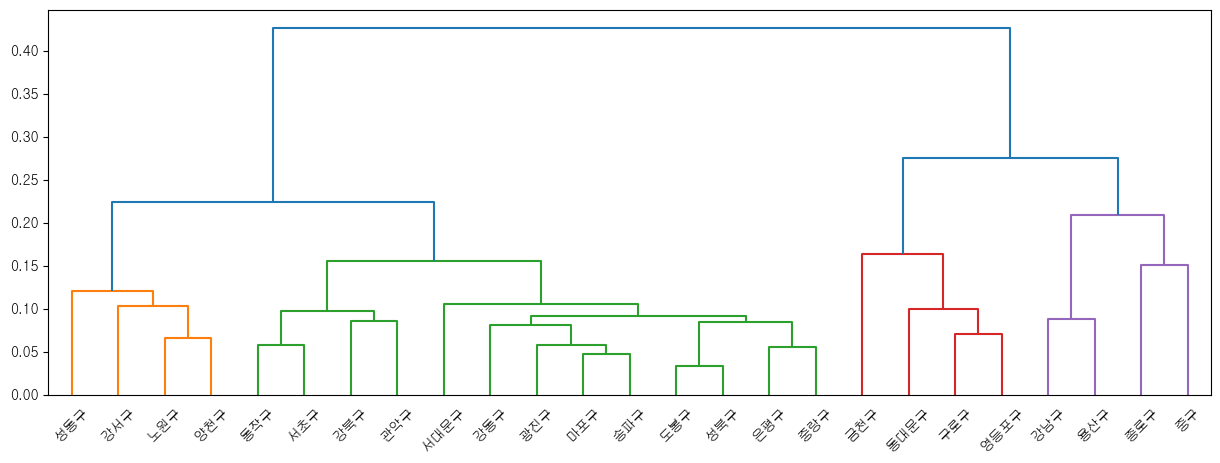

In [39]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
# matplotlib의 plt.rc()를 사용하여 폰트 설정
# 'font' : 변경할 설정 항목, family : 폰트 패밀리를 지정하는 옵션 'NanumBarunGothic'사용

plt.rcParams['axes.unicode_minus'] =False
# matplotlib의 설정값을 직접 수정
# rcParams는 matplotlib의 모든 설정값을 담고 있는 딕셔너리입니다.
# 'axes.unicode_minus'는 축에 표시되는 마이너스 기호를 유니코드 마이너스 기호로 표시할지 여부를 결정하는 설정임
# False로 설정하면 마이너스 기호가 제대로 표시되도록 합니다.


# ACF distance 계산값을 토대로 계층적 군집분석 수행 

# scipy에서 계층적 군집분석을 수행하는 cluster.hierarchy를 sch로 명명하여 import
import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt # 덴드로그램 작성을 위한 matplotlib를 import

from matplotlib import font_manager, rc
# 한글로 되어 있는 지역명이 덴드로그램에 잘 출력될 수 있도록 font_manager와 rc를 import하여 폰트설정 입력

import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/NGULIM.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

plt.figure(figsize=(15, 5)) # figsize=()로 가로 15, 세로 5의 플롯사이즈를 설정

label = acf_df.index  # acf_df의 인덱스를 label이라는 변수에 담는다.(label은 노드 이름으로 사용)

dend1 = sch.linkage(acf_df, method ='average') 
# sch의 linkage()에 acf_df를 입력하여 계층적 군집분석 수행
# method는 'average'를 선택하여 평균연결법을 구현한다.

# 임곗값(cut-off)는 linkage matrix 3번째 열의 최댓값의 30%로 설정
cutoff = 0.5 * max(dend1[:,2])  # dend1의 3번째 열을 선택하기 위해 dend1[:, 2]를 활용한다.

# 임곗값을 설정한 후, sch.dendrogram() 함수를 이용하여 덴드로그램을 완성시킨다.
dend_res1 = sch.dendrogram(dend1, color_threshold = cutoff, labels=label)

# linkage matrix는 sch.linkage()의 결과로 반환되는 행렬이다.
# 각 열은 다음과 같은 특징이 있다.
# ① 첫 번째 열: 한 클래스의 인덱스(index of a class)
# ② 두 번째 열: 다른 클래스의 인덱스(index of other class)
# ③ 세 번째 열: 클래스 사이의 거리(distance between class)
# ④ 네 번째 열: 클래스를 만드는 데 사용된 데이터 포인트의 개수(sum of the numbers in a class and other class)
# 이중 클래스 사이의 거리로 군집을 나누기 때문에 임곗값 설정을 해야 한다.

# sch.dendrogram() 함수에 dend1과 임곗값 및 labels를 입력하여 plt.show()로 출력한다.
plt.show()

### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [12]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회, '자연과학': 자연, '공학': 공학},
                      index=['3.5 ~ 4.5', '2.5 ~ 3.5', '1.5 ~ 2.5'])
display(table)

,사회과학,자연과학,공학
3.5 ~ 4.5,16,12,18
2.5 ~ 3.5,30,20,13
1.5 ~ 2.5,12,3,14


#### (1)연구가설, 귀무가설을 작성하시오

귀무가설 : 학과와 성적은 관계가 없다.

대립가설 : 학과와 성적은 관계가 있다.


#### (2) 학과와 성적이 독립일 때 기대값을 구하시오

카이제곱 검정을 검정방식으로 채택한다. (명목척도 자료 분석에 이용, 자료가 빈도로 주어졌을 때 사용)

카이제곱 검정은 관찰된 빈도와 기대되는 빈도가 의미 있게 다른지의 여부를 검정하기 위해 사용하는 방법이다.

○적합도 검정 : 관찰된 비율 값이 기댓값과 같은지 조사(어떤 모집단의 표본이 그 모집단을 대표하는지 검정)

○동질성 검정 : 두 집단의 분포가 동일한지 검정

○독립성 검정 : Contigency Table에서 두 개 이상의 변수가 서로 독립인지 검정

In [13]:
from scipy import stats
result = stats.chi2_contingency(observed=table)
result
# pvalue=0.03719883770303157 < 0.05 이므로 학과와 성적은 관계가 있다.

Chi2ContingencyResult(statistic=10.199441509990177, pvalue=0.03719883770303157, dof=4, expected_freq=array([[19.33333333, 11.66666667, 15.        ],
       [26.47826087, 15.97826087, 20.54347826],
       [12.1884058 ,  7.35507246,  9.45652174]]))

#### (3)검정통계량을 구하고 연구가설 채택여부를 작성하시오

검정통계량 statistic=10.199441509990177

pvalue=0.03719883770303157 < 0.05 이므로 학과와 성적은 관계가 있다.